# Outline
- [ 1 - Little bit of theory behind SVM](#1)
- [ 2 - Import Data](#2)
- [ 3 - <TODO>](#3)
- [ 4 - <TODO>](#4)
- [ 5 - <TODO>](#5)

<a name="1"></a>
## 1 - Little bit of theory behind SVM

Support Vector Machine (SVM) is a powerful tool for classification tasks, focusing on finding the best 
<br>boundary that separates different classes while maximizing the margin.
<br>The objective of SVM is to find the hyperplane that maximizes the margin between two classes. 
<br>The equation for the hyperplane can be expressed as:
$$
w^T x + b = 0
$$
Where:
- \( w \) is the weight vector.
- \( x \) is the input feature vector.
- \( b \) is the bias term.
The margin is defined as the distance between the hyperplane and the closest data points from each class, known as support vectors. 
$$
\frac{1}{2} \| w \|^2
$$
The optimization problem can be formulated as:
$$
\begin{align*}
    \begin{cases}
        \min_{w,b,\xi} \frac{1}{2} \| w \|^2+C\displaystyle\sum_{i=1}^l \xi_i\\
        y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \forall i\\
        \xi_i\geq0
    \end{cases}
\end{align*}
$$
Where:
- \(y_i) is the class label of the training example \( x_i \) (either +1 or -1).
- \( i \) indexes the training examples.
- \(kxi_i) - permission for model to make mistake for the object are inside margin or on the other side of hyperplane
- \(sum_of_kxi_i) - requarement for this mistakes to be as small as possible

This is nonlinear optimization problem. For solving this problem we need to use the [`Karush–Kuhn–Tucker (KKT) conditions`](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) 
<br>and formulate the Lagrangian function in order to solve the dual problem.
<br>Let's wright down a Lagrangian of our optimization problem:
$$
L(w,b,\xi,\lambda,\mu)=\frac{1}{2} \| w \|^2+C\displaystyle\sum_{i=1}^l \xi_i-\displaystyle\sum_{i=1}^l \lambda_i(y_i (w^T x_i + b)-1+\xi_i)-\displaystyle\sum_{i=1}^l \mu_i\xi_i
$$
Were lambda and mu are dual coeffitiants.
So let's wright the gradients with respect to each variables.
<br>Start from w and look what we'll get:
$$
\nabla_w L=w-\displaystyle\sum_{i=1}^l \lambda_iy_ix_i
;\nabla_w L=0=>
$$
$$
w=\displaystyle\sum_{i=1}^l \lambda_iy_ix_i
$$ (1)
<br>Based on this formula we can see that the solution for the problem is lies in finding lambdas.
<br>Now we need to wright gradient (in this case it is partial derivative) with respect to b:
$$
\nabla_b L=\displaystyle\sum_{i=1}^l \lambda_iy_i
;\nabla_b L=0 =>
$$ 
$$
\displaystyle\sum_{i=1}^l \lambda_iy_i=0
$$
(2)
<br>And finaly for ksi:
$$
\nabla_\xi L=C-\lambda_i-\mu_i
;\nabla_xi L=0=>
$$
$$
\lambda_i+\mu_i=C
$$ (3)
<br>And we also need to wright down co called Complementary slackness that sayes that the constrained functions are equal zero in solution point:
<br>This is the first one:
$$
\lambda_i(y_i (w^T x_i + b)-1+\xi_i)=0  =>
$$
$$
\lambda_i=0 \lor y_i (w^T x_i + b)=1-\xi_i
$$ (4)
<br>And the second one:
$$
\mu_i\xi_i=0=>
$$
$$
\mu_i=0 \lor \xi_i=0
$$ (5)

<br>2. 0<lambda_i<C => this object does not cross the margin but lies on that line. This is the Support Vector.
$$
0<\lambda_i<C; (3) => \mu_i=C; (5) => \xi_i=0; => y_i (w^T x_i + b)=1, y_i\in{-1,+1}
$$
$$
b = 1/y_i-w^T x_i => b = y_i-w^T x_i
$$

<br>3. Lambda_i = C and xsi_i > 0 => object crosses the magrin line
$$
\lambda_i=C; (3) => \mu_i=0; (5) => \xi_i>0;
$$

Let us put (1) back onto Lagrangian and take into account also (2) and (3). In the end of simplification we'll get this:
$$
L=\displaystyle\sum_{i=1}^l \lambda_i-\frac{1}{2}\displaystyle\sum_{i,j=1}^l \lambda_i\lambda_jy_iy_j<x_i, x_j>
$$
where
$$
<x_i, x_j> = x_i^Tx_j
$$
Wich basicaly can be writen as kernal K(<x_i,x_j>) and this is so caled "kernal trick" to represent our object in some 
<br>higher dimentional space, where this object can be lenearly separated with hyperplane.

And now we can wright the dual problem, which will be the maximization problem, for our original task of minimization:
$$
\begin{align*}
    \begin{cases}
        \max_{\lambda} (\displaystyle\sum_{i=1}^l \lambda_i-\frac{1}{2}\displaystyle\sum_{i,j=1}^l \lambda_i\lambda_jy_iy_j<x_i, x_j>)\\
        \displaystyle\sum_{i=1}^l \lambda_iy_i=0\\
        0\leq\lambda_i\leq C
    \end{cases}
\end{align*}
$$
(Dual problem SVM)

<a name="1"></a>
## 1 - Import Data

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("/Users/sergeiakhmadulin/My Drive/SVM/breast-cancer.csv")

In [7]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [28]:
data["diagnosis"] = data["diagnosis"].map({"B": 0, "M": 1})

In [29]:
corr_matrix = data.iloc[:, 1:].corr()

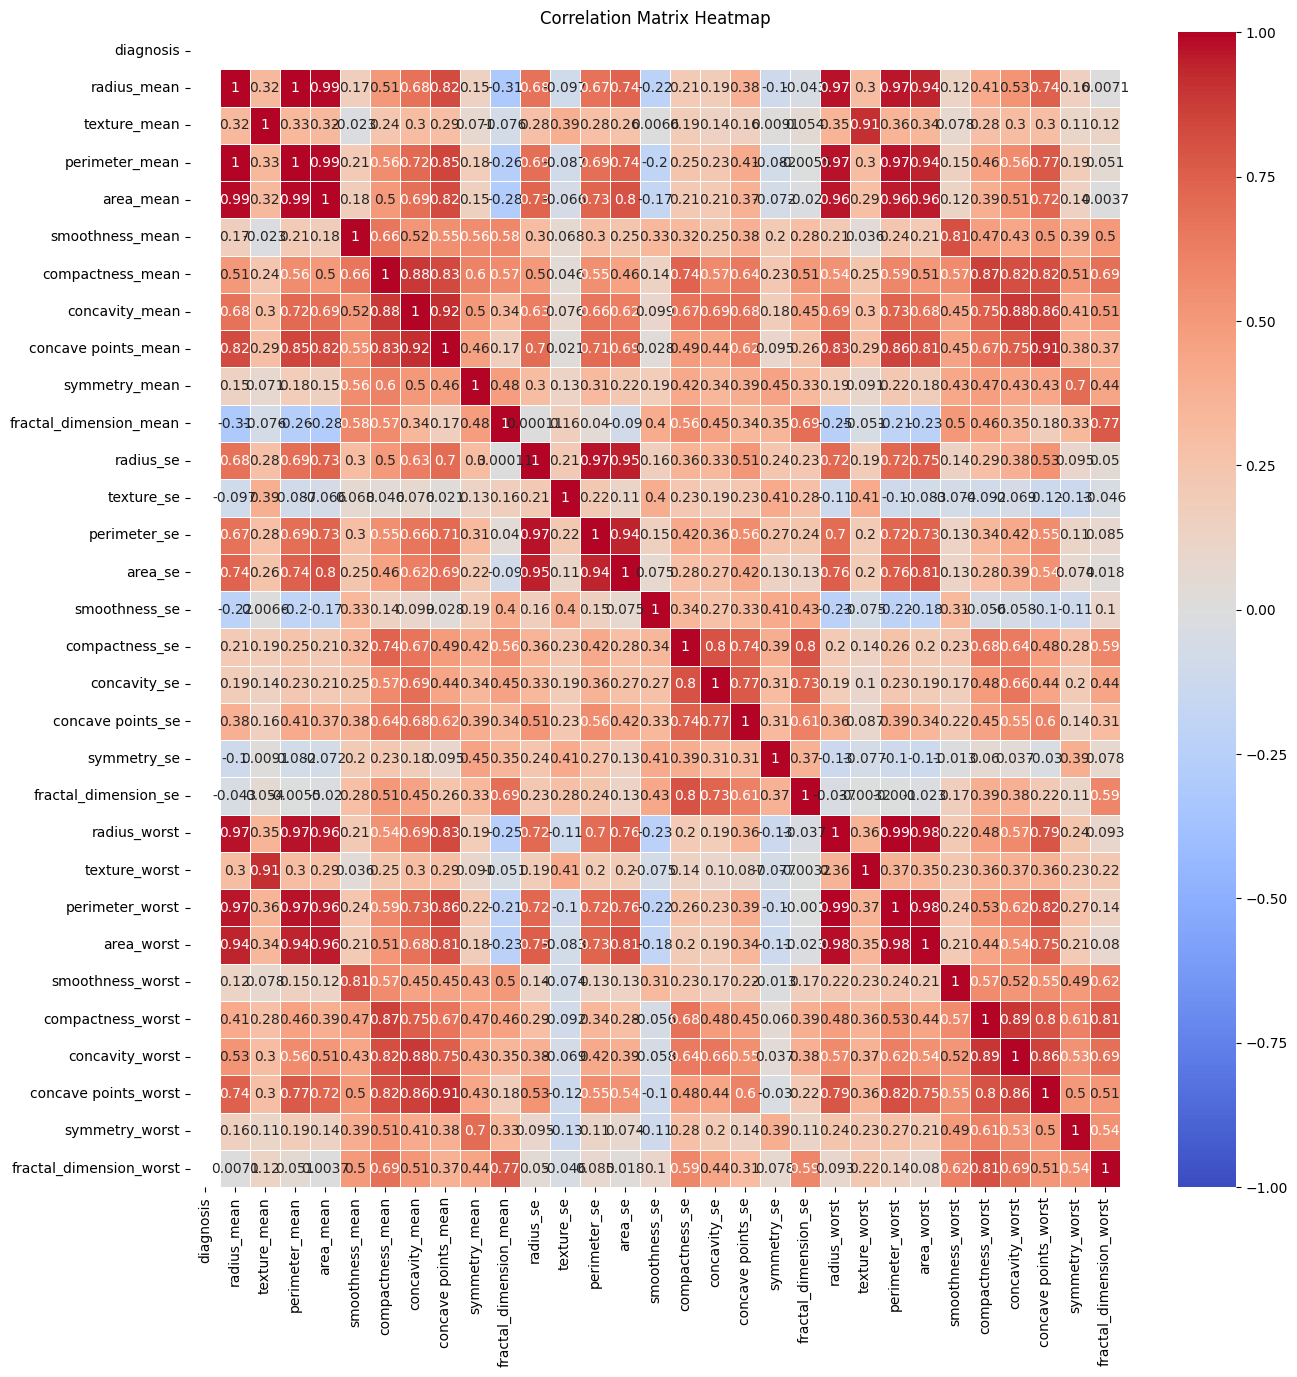

In [30]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()